# Weather data analysis and forecasting 
## Introduction
This project aims to analyze the weather data of Chennai over the past 20 years. The data was collected from an API and analyzed to reveal various insights and patterns. Finally, weather forecasting is carried out by a variety of machine learning algorithms and the best algorithm is found.
## About Chennai and its Weather Changes.
Chennai is the capital city of the Indian state of Tamil Nadu. It is located on the east coast of India and has a tropical wet and dry climate. The city experiences heavy rainfall during the monsoon season, which lasts from October to December. The temperature in Chennai is generally high throughout the year, with the hottest months being May and June. The city also experiences occasional cyclones and floods due to its proximity to the Bay of Bengal.

## This project consist of several segments
- [Importing libraries](#importing-necessary-libraries)
- [Data collection](#data-collection)
- [Exploratory data analysis](#Exploratory-Data-Analysis)
- [Weather Forecasting using Machine Learning](#weather-forecasting)

----

# Importing necessary libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import requests


----

# Data collection

The data is being collected from the API (Application Programming Interface) `Open-Meteo`. APIs are mechanisms that enable two software components to communicate with each other using a set of definitions and protocols.

#### About Open-meteo
Open-Meteo API is an open-source weather API with free access for non-commercial use and  provides global weather data via API, including current weather data, forecasts, nowcasts and historical weather data for any geographical location.

- ### Calling an API and retrieving data

In [48]:
URL = 'https://archive-api.open-meteo.com/v1/archive?latitude=13.09&longitude=80.28&start_date=1980-01-01&end_date=2023-02-28&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_hours&timezone=auto'
data= requests.get(URL)


ConnectionError: HTTPSConnectionPool(host='archive-api.open-meteo.com', port=443): Max retries exceeded with url: /v1/archive?latitude=13.09&longitude=80.28&start_date=1980-01-01&end_date=2023-02-28&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_hours&timezone=auto (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002749B97FCD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

- ### Storing the data in json format


In [ ]:
chennai = data.json()

- ### Creating a dataframe

In [ ]:
df=pd.DataFrame(chennai['daily'])
df.head(10)


,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_hours
0,1980-01-01,27.4,18.2,22.8,0.0,0.0
1,1980-01-02,27.7,19.3,23.3,0.0,0.0
2,1980-01-03,27.7,18.7,23.3,0.0,0.0
3,1980-01-04,27.3,19.3,23.7,0.0,0.0
4,1980-01-05,27.9,22.4,24.7,0.0,0.0
5,1980-01-06,28.1,21.3,24.8,0.0,0.0
6,1980-01-07,28.0,22.2,24.9,0.0,0.0
7,1980-01-08,28.3,22.5,25.0,0.0,0.0
8,1980-01-09,27.3,21.3,24.1,0.3,2.0
9,1980-01-10,27.2,21.0,23.6,0.0,0.0


In [ ]:
df.tail(10)

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,rain_sum,precipitation_hours
15755,2023-02-19,29.7,21.2,25.1,0.0,0.0
15756,2023-02-20,30.6,19.5,24.6,0.0,0.0
15757,2023-02-21,31.1,18.4,24.9,0.0,0.0
15758,2023-02-22,30.6,18.8,24.8,0.0,0.0
15759,2023-02-23,30.4,18.7,24.5,0.0,0.0
15760,2023-02-24,30.3,19.2,24.4,0.0,0.0
15761,2023-02-25,30.5,17.9,24.1,0.0,0.0
15762,2023-02-26,29.7,18.7,24.3,0.0,0.0
15763,2023-02-27,30.9,18.7,24.9,0.0,0.0
15764,2023-02-28,30.4,21.5,26.1,0.0,0.0


# Exploratory Data Analysis


- #### Getting shape of the dataframe

In [ ]:
df.shape

(15765, 6)

> This dataset consist of `15765` rows and `6` columns.

- #### Getting column names

In [ ]:
df.columns

Index(['time', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'rain_sum', 'precipitation_hours'],
      dtype='object')

- #### Getting info about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15765 entries, 0 to 15764
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 15765 non-null  object 
 1   temperature_2m_max   15765 non-null  float64
 2   temperature_2m_min   15765 non-null  float64
 3   temperature_2m_mean  15765 non-null  float64
 4   rain_sum             15765 non-null  float64
 5   precipitation_hours  15765 non-null  float64
dtypes: float64(5), object(1)
memory usage: 739.1+ KB


- #### Getting datatypes

In [ ]:
df.dtypes

time                    object
temperature_2m_max     float64
temperature_2m_min     float64
temperature_2m_mean    float64
rain_sum               float64
precipitation_hours    float64
dtype: object

- #### Checking for null values

In [ ]:
df.isnull().sum()

time                   0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
rain_sum               0
precipitation_hours    0
dtype: int64

> Seems like there is no null/empty cells.

- #### Checking for duplicated cells

In [ ]:
df.duplicated().sum()

0

> There aren't any duplicated cells.

- #### Dataframe summary

In [ ]:
pd.DataFrame({'unique':df.nunique(),
              'missing': df.isna().sum()/df.count(),
              'type':df.dtypes})

,unique,missing,type
time,15765,0.0,object
temperature_2m_max,181,0.0,float64
temperature_2m_min,164,0.0,float64
temperature_2m_mean,144,0.0,float64
rain_sum,453,0.0,float64
precipitation_hours,25,0.0,float64


# Data Cleaning

### Changing column names 

In [ ]:
df.rename(columns={'temperature_2m_max':'max_temp','temperature_2m_min':'min_temp','temperature_2m_mean':'mean_temp'},inplace=True)

### Setting `time` column as index

- Changing datatype of time column

In [ ]:
df['time']=pd.to_datetime(df['time'])

In [ ]:
df.dtypes

time                   datetime64[ns]
max_temp                      float64
min_temp                      float64
mean_temp                     float64
rain_sum                      float64
precipitation_hours           float64
dtype: object

In [ ]:
df.set_index('time',inplace=True)
df

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours
time,,,,,
1980-01-01,27.4,18.2,22.8,0.0,0.0
1980-01-02,27.7,19.3,23.3,0.0,0.0
1980-01-03,27.7,18.7,23.3,0.0,0.0
1980-01-04,27.3,19.3,23.7,0.0,0.0
1980-01-05,27.9,22.4,24.7,0.0,0.0
...,...,...,...,...,...
2023-02-24,30.3,19.2,24.4,0.0,0.0
2023-02-25,30.5,17.9,24.1,0.0,0.0
2023-02-26,29.7,18.7,24.3,0.0,0.0


# Exploratory Data Analysis

----
- #### Statistical Description

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,15765.0,31.840419,3.430826,21.8,28.7,32.0,34.5,42.5
min_temp,15765.0,24.790301,2.759432,15.0,23.0,25.1,26.9,31.8
mean_temp,15765.0,27.804675,2.704417,20.4,25.4,28.0,29.9,35.6
rain_sum,15765.0,2.653644,8.058042,0.0,0.0,0.0,1.6,231.8
precipitation_hours,15765.0,3.538979,5.896206,0.0,0.0,0.0,5.0,24.0


> This table gives statistical description of all variables in the data frame.

- #### Correlation Matrix

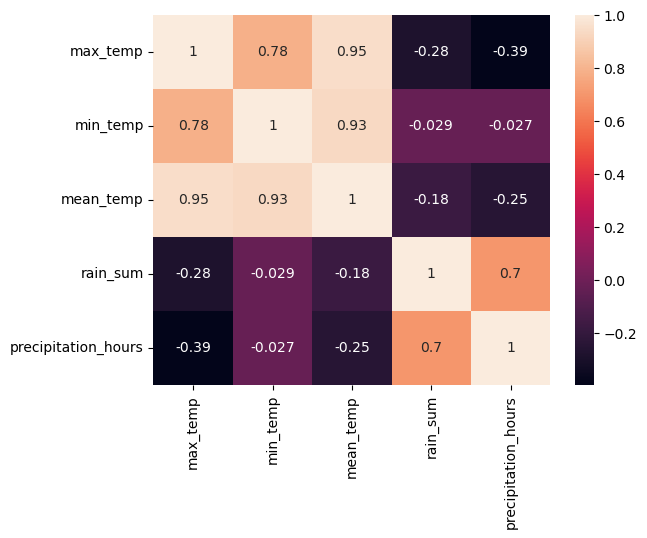

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

- #### Pairplot between all variables.

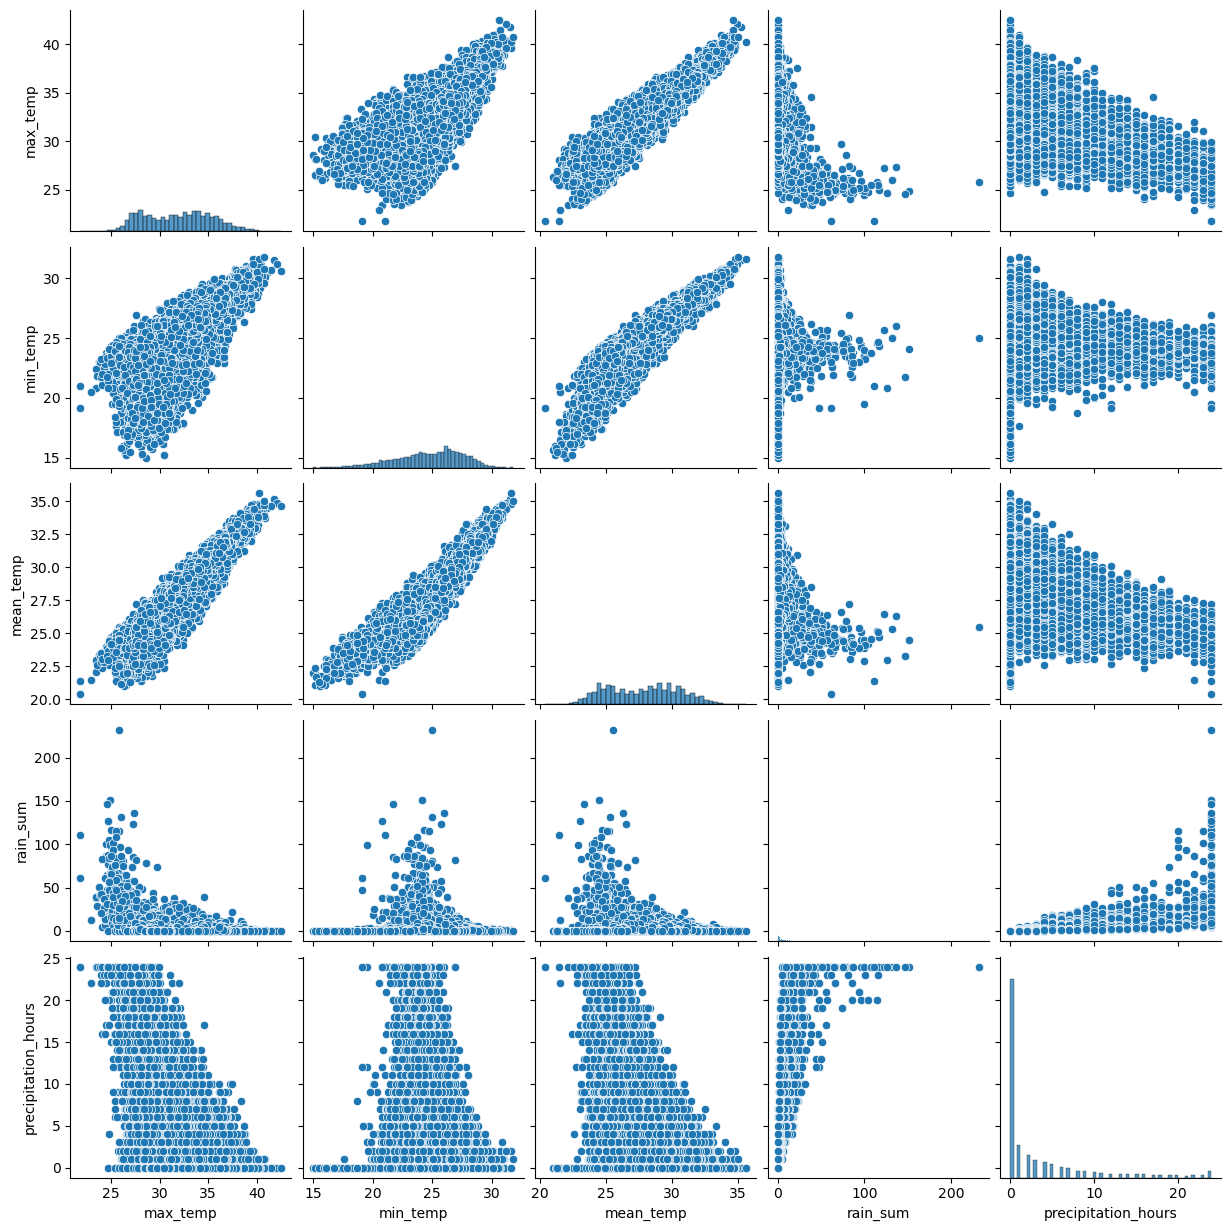

In [106]:
sns.pairplot(df)
plt.show()

> This heat map and pair plot shows the correlation among all variables. 
- `max_temp`, `min_temp` and `mean_temp` have a positive correlation.
- Likewise, `rain_sum` and `precipitation_hours` have a positive correlation.

- #### Distribution of `rain_sum`

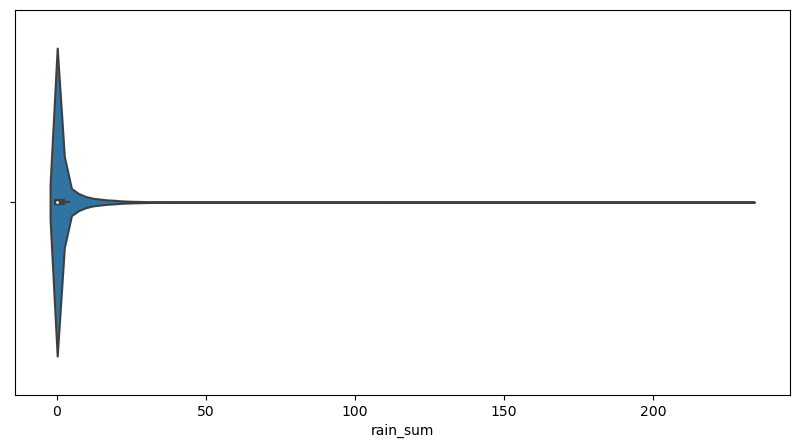

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.rain_sum)
plt.show()

- #### Distribution of `maximum_temperature`

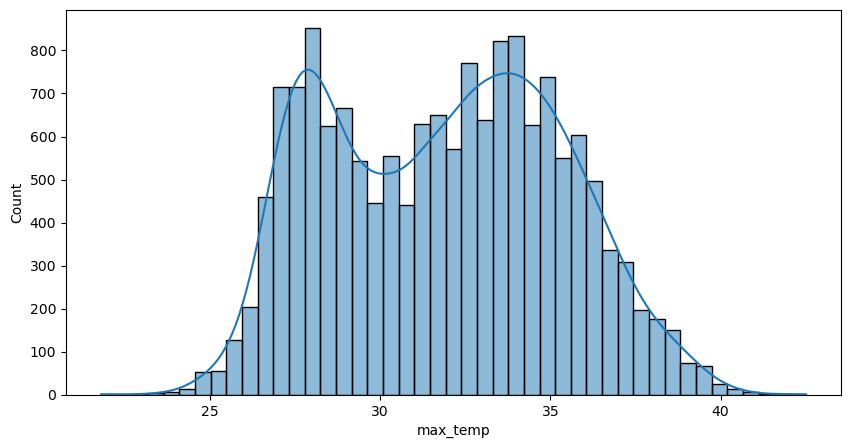

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['max_temp'],kde=True)
plt.show()

The maximum temperature occurs most frequently at `27-28°C` and `33-34°C`.

- #### Distribution of `minimum_temperature`

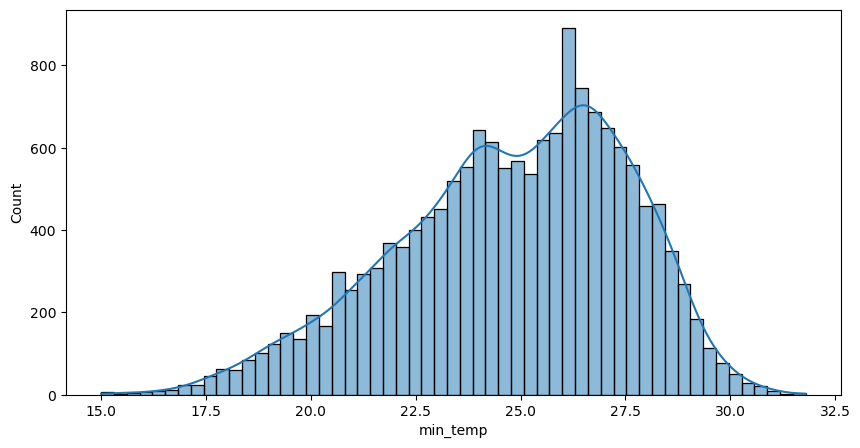

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['min_temp'],kde=True)
plt.show()

The minimum temperature occurs most frequently at  `25.5-27.5°C` .

- #### Distribution of `mean_temperature`

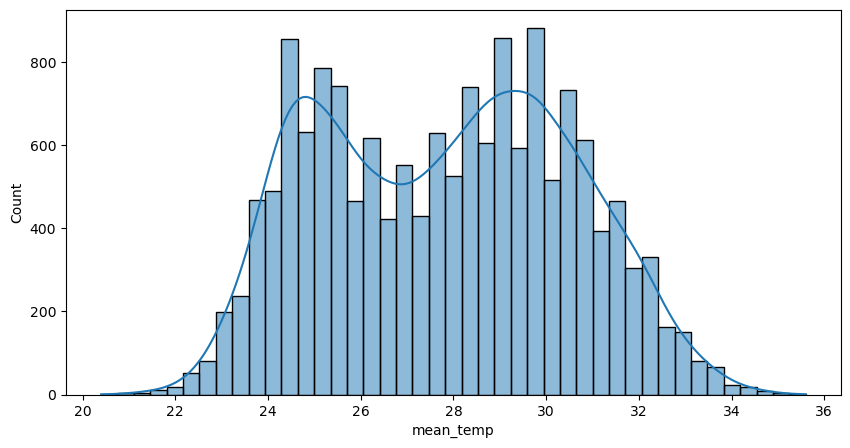

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['mean_temp'],kde=True)
plt.show()

The mean temperature occurs most frequently at  `24-26°C` and `28-30°C` .

- #### Distribution comparison of `max_temp`,`mean_temp` and `min_temp`.

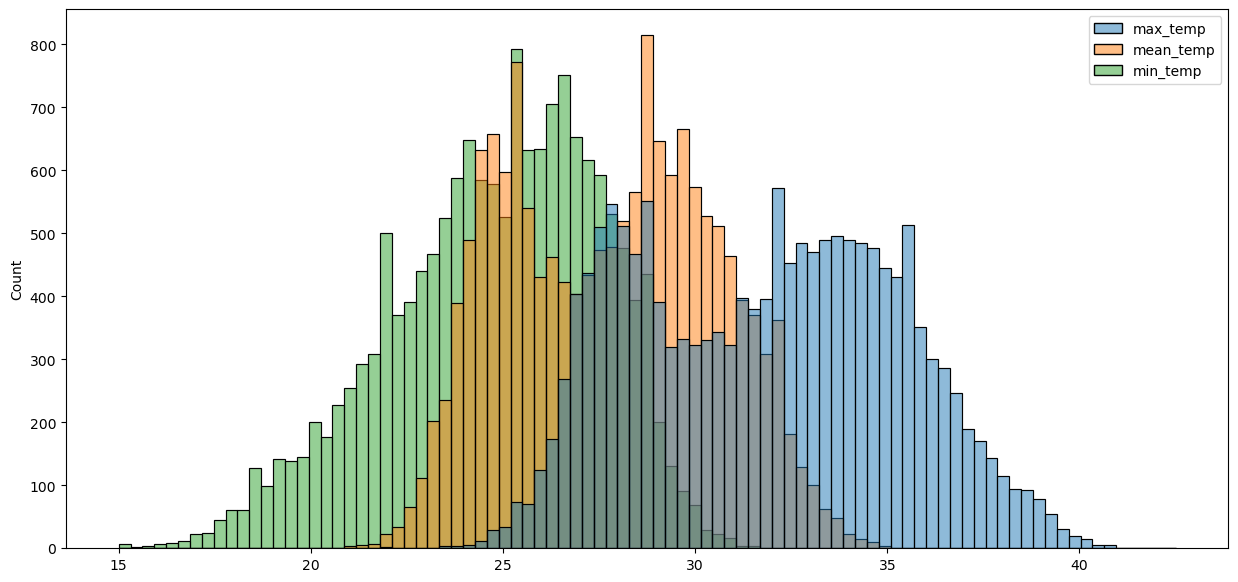

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df[['max_temp','mean_temp','min_temp']])
plt.show()

- #### Distribution of precipitation Hours

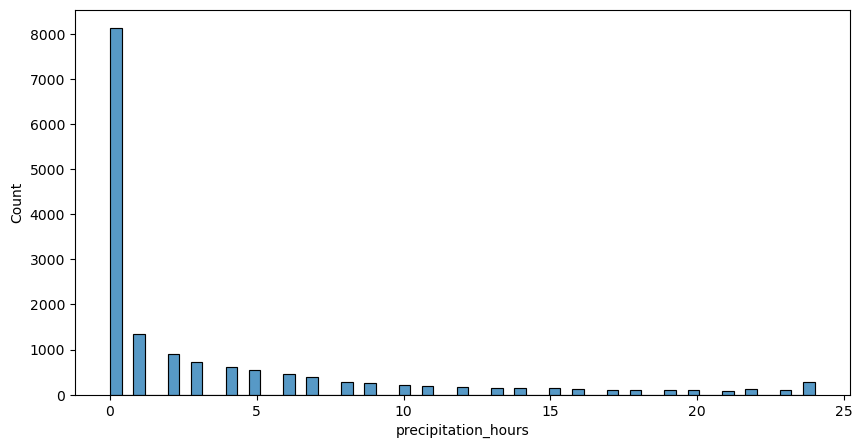

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['precipitation_hours'])
plt.show()

This plot shows the distribution of `precipitation_hours`

Distribution of 

- #### Years with maximum rainfall days

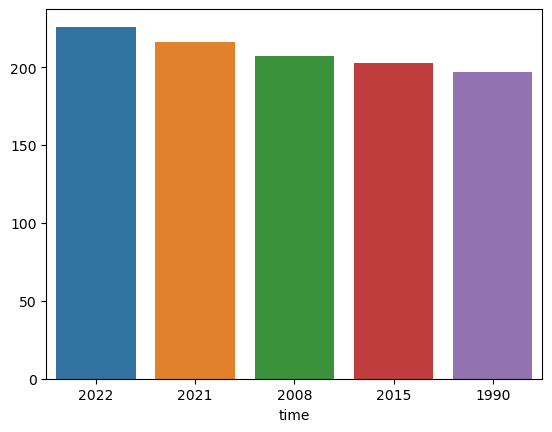

In [65]:
max_day_rain=df[df['rain_sum']!=0.0].groupby(by=df[df['rain_sum']!=0.0].index.year)['rain_sum'].count()
max_day_rain=max_day_rain.sort_values(ascending=False).head()
sns.barplot(x= max_day_rain.index,y=max_day_rain.values,order=max_day_rain.index)
plt.show()

- #### Years with maximum days without rainfall

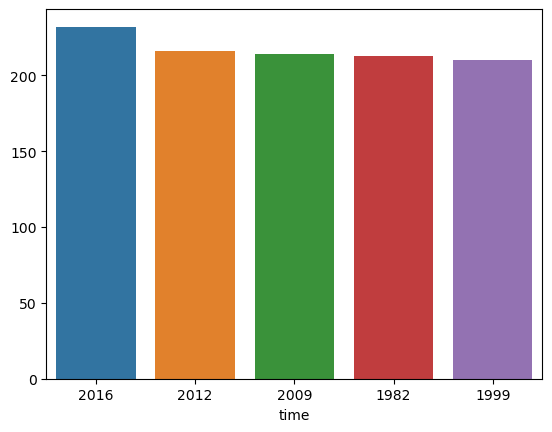

In [66]:
max_day_without_rain=df[df['rain_sum']==0.0].groupby(by=df[df['rain_sum']==0.0].index.year)['rain_sum'].count()
max_day_without_rain=max_day_without_rain.sort_values(ascending=False).head()
sns.barplot(x= max_day_without_rain.index,y=max_day_without_rain.values,order=max_day_without_rain.index)
plt.show()

- #### Years with more precipitatiion hours

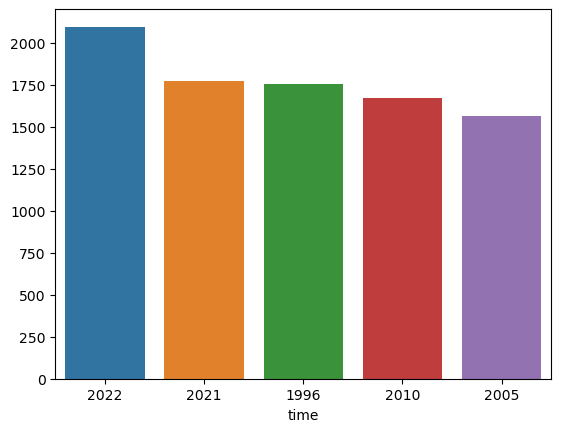

In [67]:
max_precp_hours=df.groupby(df.index.year)['precipitation_hours'].sum()
max_precp_hours=max_precp_hours.sort_values(ascending=False).head()
sns.barplot(x= max_precp_hours.index,y=max_precp_hours.values,order=max_precp_hours.index)
plt.show()

- #### Years with less precipitatiion hours

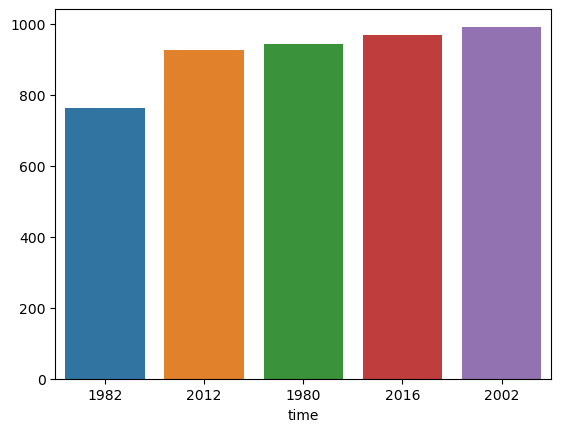

In [68]:
min_precp_hours=df.groupby(df.index.year)['precipitation_hours'].sum()
min_precp_hours=min_precp_hours.loc[:2022].sort_values(ascending=True).head()
sns.barplot(x= min_precp_hours.index,y=min_precp_hours.values,order=min_precp_hours.index)
plt.show()

- #### Years with highest rainfall

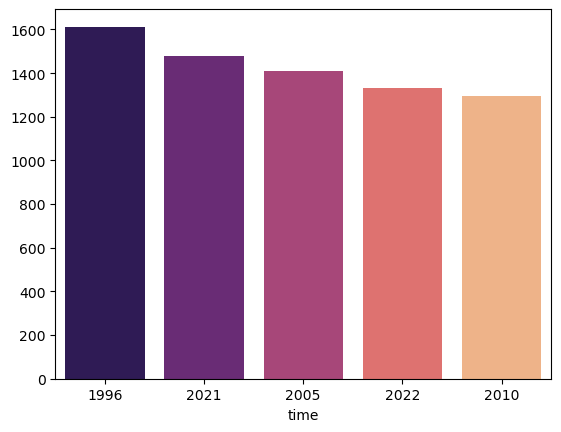

In [79]:
max_rain_sum=df.groupby(df.index.year)['rain_sum'].sum()
max_rain_sum=max_rain_sum.sort_values(ascending=False).head()
sns.barplot(x= max_rain_sum.index,y=max_rain_sum.values,order=max_rain_sum.index,palette='magma')
plt.show()

- #### Years with lowest rainfall

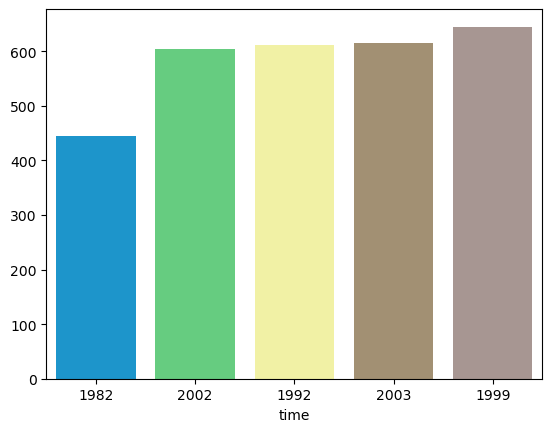

In [82]:
min_rain_sum=df.groupby(df.index.year)['rain_sum'].sum()
min_rain_sum=min_rain_sum.loc[:2022].sort_values().head()
sns.barplot(x= min_rain_sum.index,y=min_rain_sum.values,order=min_rain_sum.index,palette='terrain')
plt.show()

- #### Percentage of rainy days and non-rain days

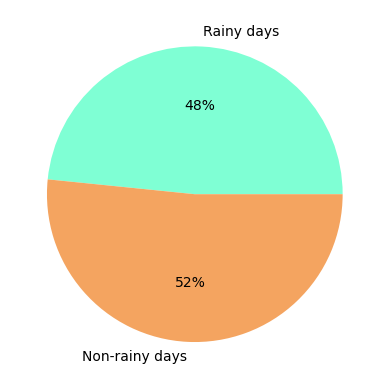

In [91]:
rain_days=df['rain_sum'][df['rain_sum']!=0.0].count()
non_rain_days=df['rain_sum'][df['rain_sum']==0.0].count()
plt.pie([rain_days,non_rain_days],labels=['Rainy days','Non-rainy days'],autopct='%.0f%%',colors=['aquamarine','sandybrown'])
plt.show()

- #### Rain trend over years

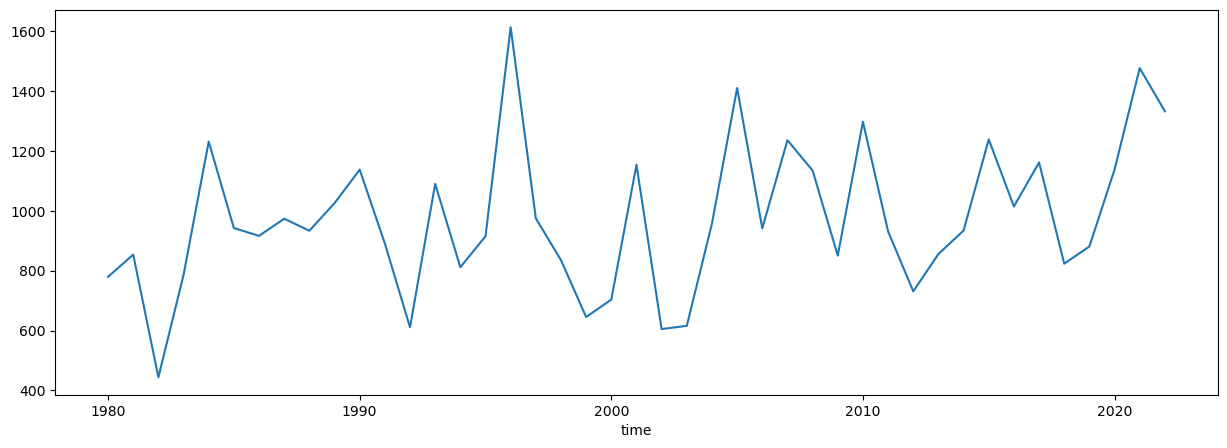

In [118]:
plt.figure(figsize=(15,5))
rainfall_trend=df[:'2022'].groupby(df[:'2022'].index.year)['rain_sum'].sum()
sns.lineplot(x=rainfall_trend.index,y=rainfall_trend.values)
plt.show()

Temperature


- #### Highest of max_temp

In [120]:
df[df['max_temp']==df['max_temp'].max()]['max_temp']

time
1980-05-24    42.5
Name: max_temp, dtype: float64

- #### Minimum of max_temp

In [122]:
df[df['max_temp']==df['max_temp'].min()]['max_temp']

time
1980-12-05    21.8
2022-11-21    21.8
Name: max_temp, dtype: float64

----
- #### Highest of min_temp


In [123]:
df[df['min_temp']==df['min_temp'].max()]['min_temp']

time
2017-05-18    31.8
Name: min_temp, dtype: float64

- #### Lowest of min_temp

In [124]:
df[df['min_temp']==df['min_temp'].min()]['min_temp']

time
1989-02-03    15.0
Name: min_temp, dtype: float64

- #### Temperature trend

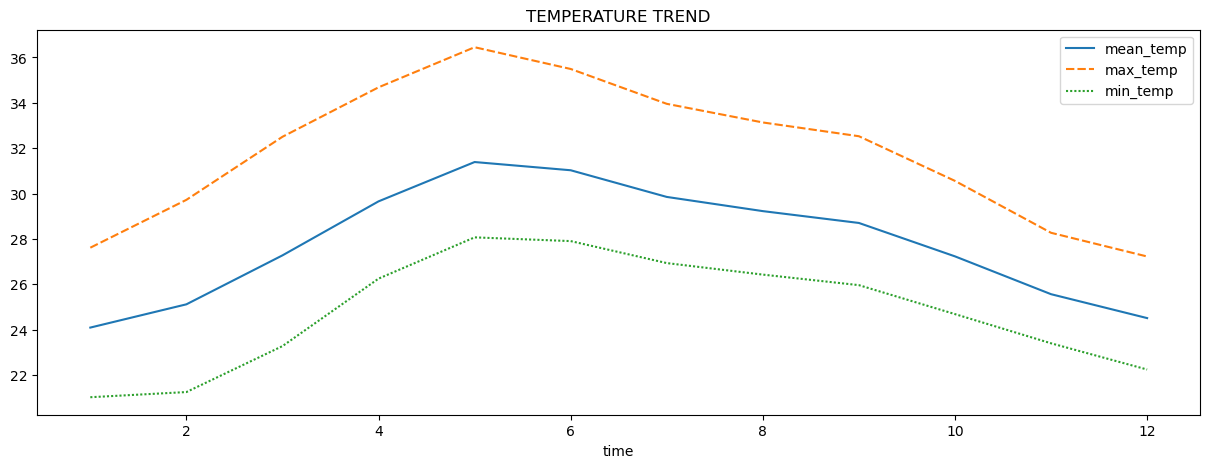

In [127]:
plt.figure(figsize=(15,5))
plt.title('TEMPERATURE TREND')
temp_trend=df.groupby(df.index.month)[['mean_temp','max_temp','min_temp']].mean()
sns.lineplot(temp_trend)
plt.show()

> This line plot shows the trend of maximum temperature, mean temperature and minimum temperature.
-  The temperature gradually increases during the month of `February`
- Attains peak during the month of `May` and `June`
- And then decreases gradually 

----

## Analysis of weather data of year `2022`

- #### Temperature trend of year `2022`

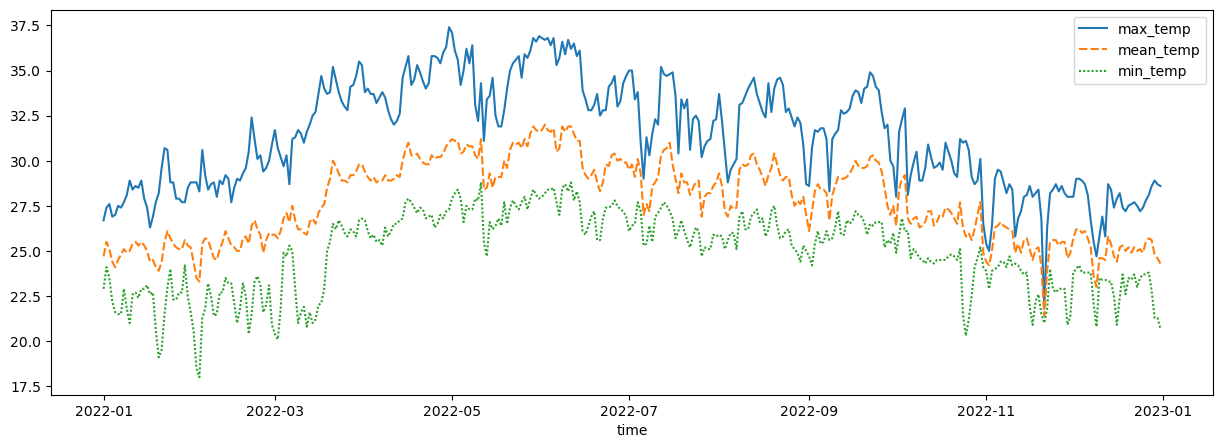

In [128]:
plt.figure(figsize=(15,5))
year_2022=df[df.index.year==2022]
sns.lineplot(year_2022[['max_temp','mean_temp','min_temp']])
plt.show()

- #### Heatmap of temperature for year `2022`

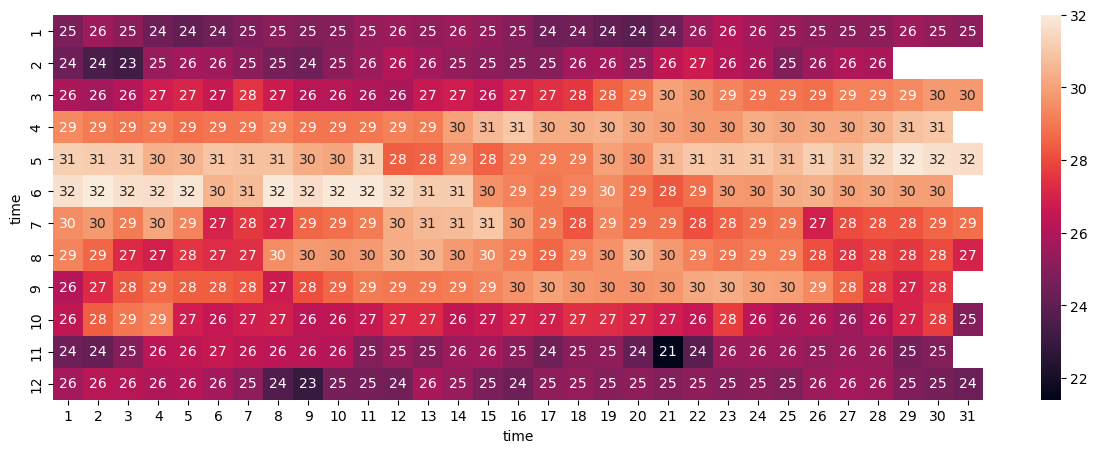

In [108]:
plt.figure(figsize=(15,5))
temp_heatmap_2022=year_2022.pivot_table(index=year_2022.index.month,columns=year_2022.index.day,values='mean_temp')
sns.heatmap(temp_heatmap_2022,annot=True)
plt.show()

### Maximum Temperature of year `2022`

In [52]:
year_2022['max_temp'].max()

37.4

In [53]:
year_2022[year_2022['max_temp']==year_2022['max_temp'].max()]

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours
time,,,,,
2022-04-30,37.4,27.3,31.0,0.0,0.0


### Minimum Temperature of year `2022`

In [54]:
year_2022['min_temp'].min()

18.0

In [55]:
year_2022[year_2022['min_temp']==year_2022['min_temp'].min()]

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours
time,,,,,
2022-02-03,28.3,18.0,23.3,0.0,0.0


In [56]:
df.loc[:'2021']['max_temp'].mean()

31.863783325728438

In [57]:
df.loc[:'2021']['min_temp'].mean()

24.804145753210353

<AxesSubplot:>

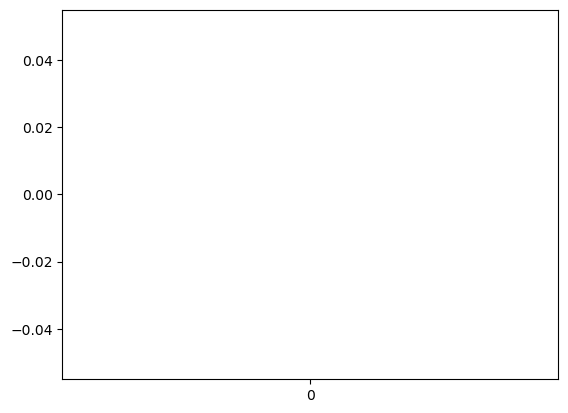

In [58]:
sns.barplot()

### Rainfall trend of year `2022`

<AxesSubplot:xlabel='time'>

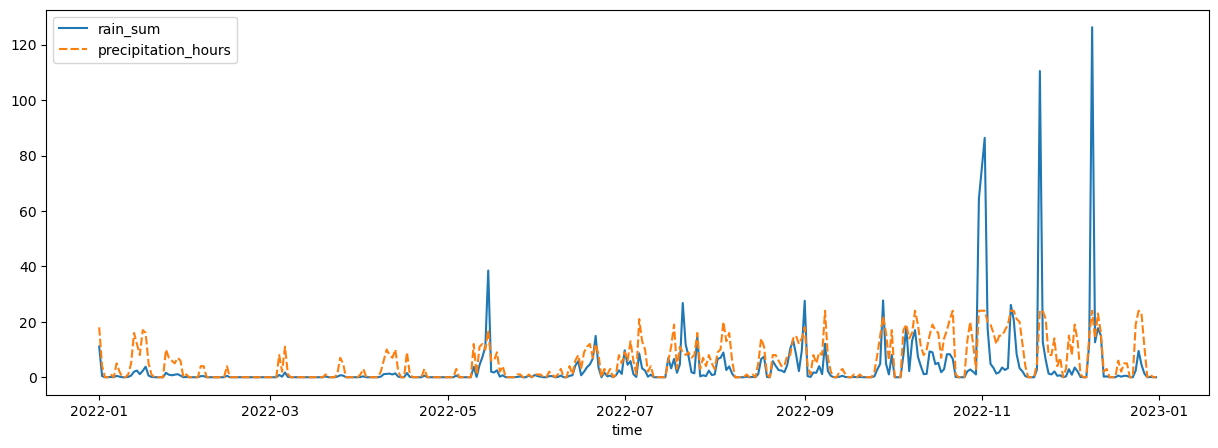

In [59]:
plt.figure(figsize=(15,5))
sns.lineplot(year_2022[['rain_sum','precipitation_hours']])

In [60]:
rain_avg_trend=df.groupby([df.index.month,df.index.day])['rain_sum'].mean()
rain_avg_trend=pd.DataFrame(rain_avg_trend)

In [61]:
rain_avg_trend

rain_sum
time time          
1    1     0.956818
     2     0.815909
     3     1.004545
     4     1.325000
     5     1.611364
...             ...
12   27    0.513953
     28    1.065116
     29    3.581395
     30    4.739535
     31    1.251163

[366 rows x 1 columns]

In [62]:
sns.lineplot(x=rain_avg_trend.index,y=rain_avg_trend.values)

AttributeError: 'MultiIndex' object has no attribute '_data'

# Weather Forecasting

## Data Preprocessing

In [ ]:
df2 = df.copy()

### Creating a target variable `temp`

In [ ]:
df2['temp']=df['mean_temp'].shift(-1)
df2 = df2[:-1]
df2

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours,temp
time,,,,,,
1980-01-01,27.4,18.2,22.8,0.0,0.0,23.3
1980-01-02,27.7,19.3,23.3,0.0,0.0,23.3
1980-01-03,27.7,18.7,23.3,0.0,0.0,23.7
1980-01-04,27.3,19.3,23.7,0.0,0.0,24.7
1980-01-05,27.9,22.4,24.7,0.0,0.0,24.8
...,...,...,...,...,...,...
2023-02-23,30.4,18.7,24.5,0.0,0.0,24.4
2023-02-24,30.3,19.2,24.4,0.0,0.0,24.1
2023-02-25,30.5,17.9,24.1,0.0,0.0,24.3


In [ ]:
x=df2.loc[:'2020-12-31']
x

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours,temp
time,,,,,,
1980-01-01,27.4,18.2,22.8,0.0,0.0,23.3
1980-01-02,27.7,19.3,23.3,0.0,0.0,23.3
1980-01-03,27.7,18.7,23.3,0.0,0.0,23.7
1980-01-04,27.3,19.3,23.7,0.0,0.0,24.7
1980-01-05,27.9,22.4,24.7,0.0,0.0,24.8
...,...,...,...,...,...,...
2020-12-27,27.4,22.4,24.6,0.0,0.0,24.3
2020-12-28,27.0,21.5,24.3,0.0,0.0,25.2
2020-12-29,27.0,23.6,25.2,0.0,0.0,24.7


In [ ]:
y= df2.loc['2021-01-01':]
y

,max_temp,min_temp,mean_temp,rain_sum,precipitation_hours,temp
time,,,,,,
2021-01-01,26.8,23.5,24.8,0.0,0.0,24.2
2021-01-02,25.8,23.6,24.2,8.9,15.0,25.2
2021-01-03,26.5,24.4,25.2,3.4,13.0,25.1
2021-01-04,27.3,23.3,25.1,1.5,8.0,24.4
2021-01-05,26.6,23.7,24.4,51.5,24.0,24.8
...,...,...,...,...,...,...
2023-02-23,30.4,18.7,24.5,0.0,0.0,24.4
2023-02-24,30.3,19.2,24.4,0.0,0.0,24.1
2023-02-25,30.5,17.9,24.1,0.0,0.0,24.3


## Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x[['max_temp','min_temp','mean_temp']],x['temp'])

LinearRegression()

In [ ]:
reg.score(y[['max_temp','min_temp','mean_temp']],y['temp'])

0.9293210294860885

In [ ]:
temp_pred = reg.predict(y[['max_temp','min_temp','mean_temp']])
temp_actual = y['temp']

In [ ]:
from sklearn.metrics import r2_score
r2_score(temp_actual,temp_pred)

0.9293210294860885

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(temp_actual,temp_pred)

0.4682291752541946

<AxesSubplot:xlabel='time', ylabel='temp'>

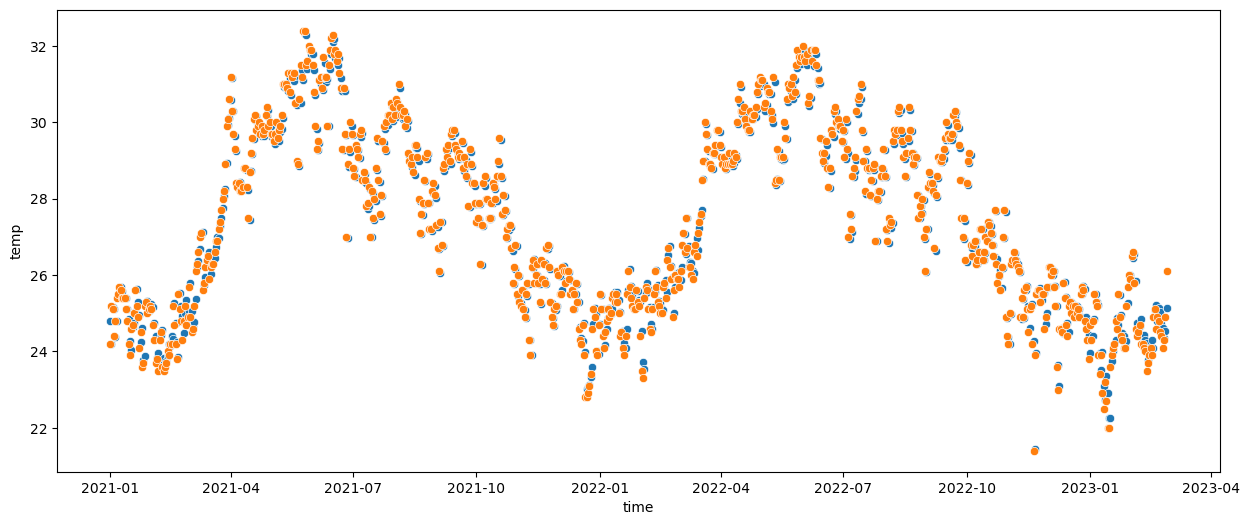

In [ ]:
plt.figure(figsize=(15,6))

sns.scatterplot(x=y.index,y=temp_pred)
sns.scatterplot(x=y.index,y=temp_actual)

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randreg=RandomForestRegressor(n_estimators=250)
randreg.fit(x[['max_temp','min_temp','mean_temp']],x['temp'])

RandomForestRegressor(n_estimators=250)

In [ ]:
randreg.score(y[['max_temp','min_temp','mean_temp']],y['temp'])

0.9181846130428848

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decisionReg= DecisionTreeRegressor()

In [ ]:
decisionReg.fit(x[['max_temp','min_temp','mean_temp']],x['temp'])

DecisionTreeRegressor()

In [ ]:
decisionReg.score(y[['max_temp','min_temp','mean_temp']],y['temp'])

0.8552959481094414